# Check the separation of features using SVM

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np

from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:

def chk_features(data_func):
    
    get_data = data_func
    #fig = plt.figure(figsize=(10, 10))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    #fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    def plot_(X, y, labels, ax, gender):
        ax.plot(X[labels == "Desc" ,0], X[labels == "Desc" ,1], '.r', markersize=10, label='Desc')    
        ax.plot(X[labels == "Pred" ,0], X[labels == "Pred" ,1], '.b', markersize=10, label='Pred')    
        ax.set_title(gender, fontsize=30)
        ax.set_xlabel('C1', fontsize=25)
        ax.set_ylabel('C2', fontsize=25)
        ax.legend(fontsize=25)
    
        if ax is None:
            ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

    
        # create grid to evaluate model
        x = np.linspace(xlim[0], xlim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        P = model.decision_function(xy).reshape(X.shape)
    
        # plot decision boundary and margins
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])


    X, y, labels = get_data("female")
    plot_(X, y, labels, ax1, "female")
    
    X, y, labels  = get_data("male")
    plot_(X, y, labels, ax2, "male")


# Melissa features

female accuracy=0.638
male accuracy=0.774


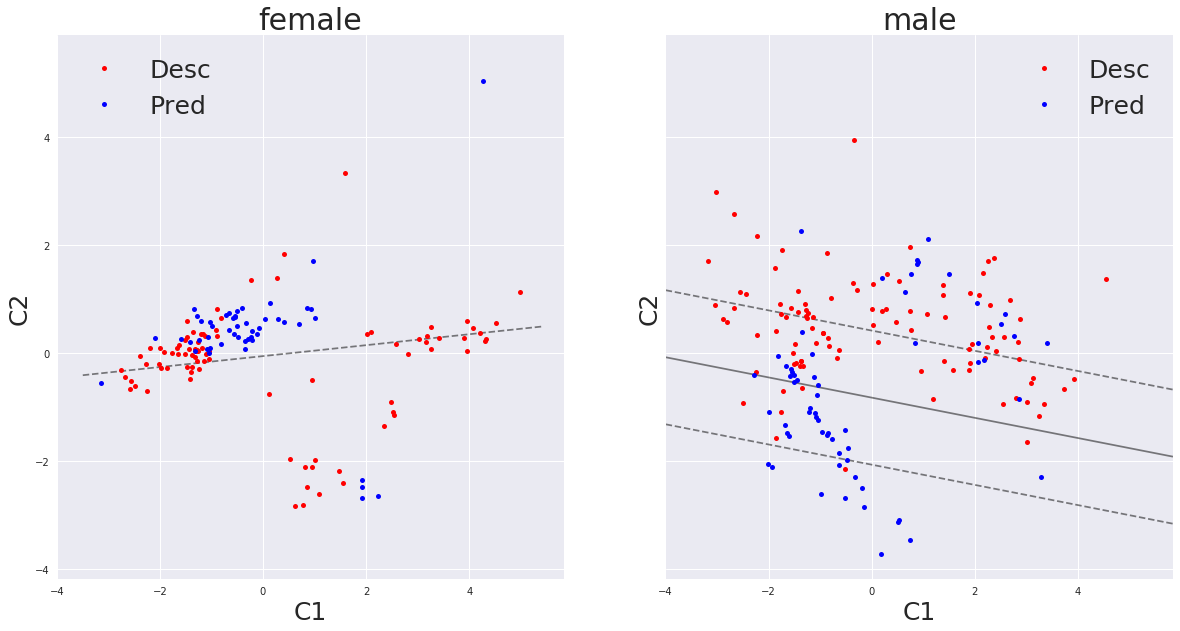

In [3]:
def get_data(gender):
    d = "{}.csv".format(gender)
    names = ["Seq", "Sex", "Ctxt", "Time_begin", "Time_end", "Duration", "Tot_fre_min", "Tot_fre_max",
             "Tot_peak", "First_peak", "End_peak", "Nb_harmonic"," Harmonic_nrj", "Bandwidth_tot"]
    df = pd.read_csv(d, header=None, names=names)
    
    features = df[["Duration", "Tot_fre_min", "Tot_fre_max", "Tot_peak", "First_peak", "End_peak", "Nb_harmonic"," Harmonic_nrj", "Bandwidth_tot"]].values
    labels = df.Ctxt
    
    X = PCA(n_components=2).fit_transform(features)
    y = LabelEncoder().fit(labels).transform(labels)
    model.fit(X, y)
    accuracy = model.fit(X, y).score(X, y)
    print("{} accuracy={:.3f}".format(gender, accuracy))
        
    return X, y, labels


chk_features(get_data)



# LSTM features

IOError: [Errno 2] No such file or directory: 'female_lstmfeat.csv'

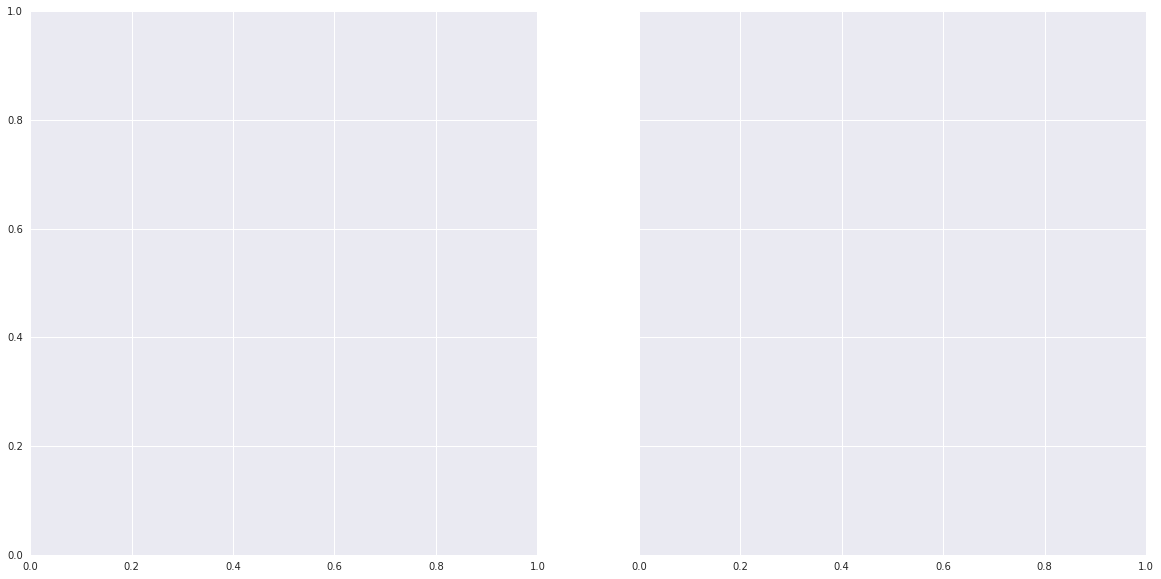

In [4]:
def read_csv(data_file):
    labels_from_csv = []
    features_from_csv = []
    with open(data_file, 'r') as dfile:
        for line in dfile.readlines():
            row = line.strip().split(',')
            labels_from_csv.append(row[0])
            features_from_csv.append([float(x) for x in row[1:]])
    return features_from_csv, labels_from_csv


def get_data(gender):
    features, labels = read_csv("{}_lstmfeat.csv".format(gender))
    features = np.array(features)
    labels = np.array(labels)
    
    X = PCA(n_components=2).fit_transform(features)
    y = LabelEncoder().fit(labels).transform(labels)
    model.fit(X, y)
    accuracy = model.fit(X, y).score(X, y)
    print("{} accuracy={:.3f}".format(gender, accuracy))
        
    return X, y, labels

chk_features(get_data)


# TripletLoss features

female accuracy=0.986
male accuracy=0.881


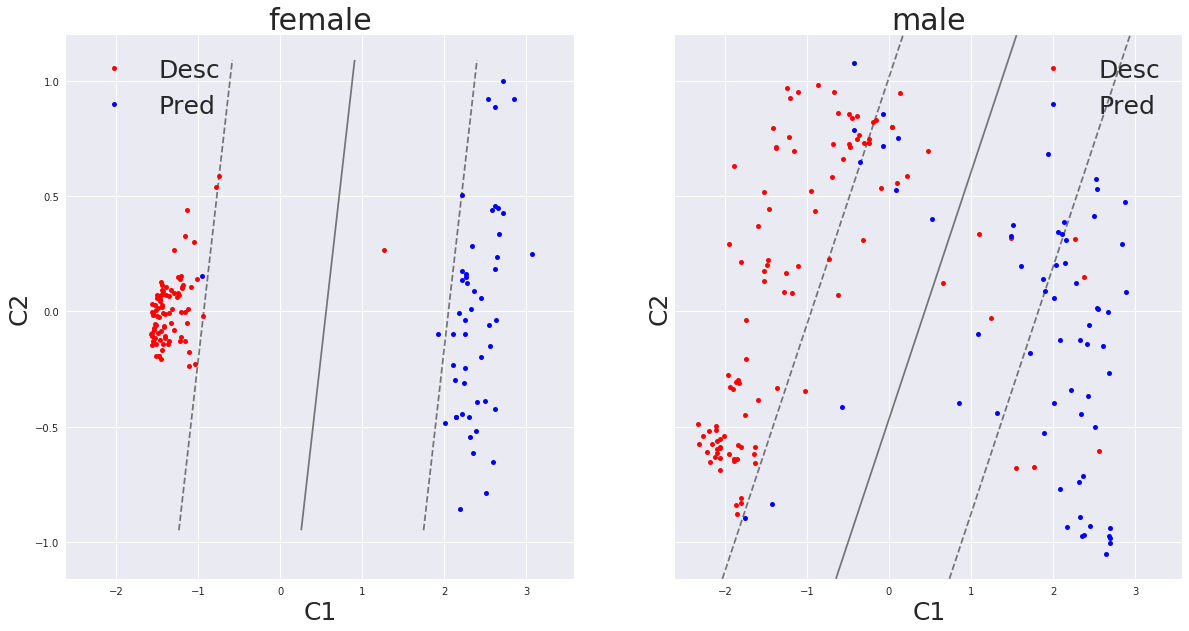

In [5]:
def get_data(gender):
    features, labels = read_csv("{}_tripletloss.csv".format(gender))
    features = np.array(features)
    labels = np.array(labels)
    
    X = PCA(n_components=2).fit_transform(features)
    y = LabelEncoder().fit(labels).transform(labels)
    model.fit(X, y)
    accuracy = model.fit(X, y).score(X, y)
    print("{} accuracy={:.3f}".format(gender, accuracy))
        
    return X, y, labels
    
chk_features(get_data)
